In [31]:
## 2019-07-10
## 1.tensorflow module 설치 ( cpu용 )
## > conda install tensorflow

import tensorflow as tf

In [32]:
## 2. Hello World 출력
## 상수를 하나 만들어요( 상수 Node 생성 )
## Tensorflow Node는 숫자 연산과 데이터 입출력을 담당.
## Session을 이용해서 Node를 실행시켜야지 Node가 가지고 있는 데이터를 출력할 수 있다.

my_node = tf.constant("Hello World")

sess = tf.Session()
print(sess.run(my_node).decode()) # b'Hello World'에서 b : binary text / .decode()는 원래 형태대로 출력해줌

Hello World


In [33]:
## TensorFlow : Google이 만든 machine library 
##              open source library
##              수학적 계산을 하기 위한 library
##              data flow graph를 이용해요~! ( node와 edge로 이루어진 방향성있는)

## data flow graph는 Node와 Edge로 구성된 벙향성 있는 graph

## Node : 데이터의 입출력과 수학적 연산
## Edge : Tensor를 Node로 실어 나르는 역할
## Tensor : 동적 크기의 다차원 배열을 지칭

In [34]:
import tensorflow as tf

node1 = tf.constant(10, dtype=tf.float32)
node2 = tf.constant(20, dtype=tf.float32)

node3 = node1 + node2

## 그래프를 실행시키기 위해 runner의 역할을 하는 Session객체가 있어야한다.
sess = tf.Session()
# print(sess.run(node3))
# print(sess.run(node1,node2)) # 복수개의 노드를 실행하려면 배열형태로 입력해야함!!
print(sess.run([node1,node2,node3]))

[10.0, 20.0, 30.0]


In [35]:
import tensorflow as tf
#  placeholder 를 이용
# 2개의 수를 입력으로 받아서 더하는 프로그램
# placeholder: 입력 데이터를 받아들이기위한 저장공간  / 값이 없을때 사용
#               데이터를 담는 박스같은 개념,
node1 = tf.placeholder(dtype=tf.float32) 
node2 = tf.placeholder(dtype=tf.float32)

node3 = node1 + node2

sess = tf.Session()
result = sess.run(node3, feed_dict={node1 : 10 , node2 : 20}) # key와 vlaue의 값으로 할당
print(result)

30.0


In [36]:
import tensorflow as tf

node1 = tf.constant([10,20,30], dtype=tf.int32)
print(node1)
node2 = tf.cast(node1, dtype=tf.float32)
print(node2)

# ★연산할때마다 항상 데이터 타입 같게!!!★

Tensor("Const_27:0", shape=(3,), dtype=int32)
Tensor("Cast_2:0", shape=(3,), dtype=float32)


In [41]:
import tensorflow as tf

# training data set
x = [1,2,3]
y = [1,2,3] # label

# 선형회귀 ( linear regression )
# 가장 큰 목표는 가설의 완성
# 가설( hypothesis ) = Wx + b
# W와 b를 정의( 변수로 )
# Weight 와 bias의 정의
W = tf.Variable(tf.random_normal([1]),name="weight") # tensorflow node로 만들꺼임 # Variable : 변수처럼 동작하는 데이터
# random_nomal() :  표준정규분포  , 배열형태로 어떻게 출력할지 적어줘야함
b = tf.Variable(tf.random_normal([1]),name="bias")

# W도  node b도 node => 결과 값도 node

# Hypothesis( 가설 )
# 우리의 최종 목적은 training data에 가장 근접한 Hypothesis로 만드는 것 (W와 b를 결정)
# 잘만들어진 가설은 W가 1에 가깝고 b가 0에 가까워야한다.
H = W * x + b # H(x) = Wx + b 를 수학적 식으로 표현

# cost(loss) Function
# 우리의 목적은 cost 함수를 최소로 만드는 W와 b를 구하는 거다.
cost = tf.reduce_mean(tf.square(H - y)) # reduce_mean() : 평균구하는거 / tf.square() : 제곱하라는거 

## cost function minimize (최소화)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) #  tf.train.GradientDescentOptimizer() - 미분
train = optimizer.minimize(cost)

## runner 생성 - 그래프를 생성하기위한 session 객체
sess = tf.Session()
## global variable의 초기화
sess.run(tf.global_variables_initializer())

## 학습을 진행  - 한번에 최소값을 얻어낼수 없고 기본값보다 작은값을 얻을 수 있도록 하는 식을 현재 작성한거임 
## => 반복하다보면 제일작은 값이나옴
for step in range(4000):
    # 반복하면서 train을 실행시킬꺼임
    _, w_val, b_val, cost_val =  sess.run([train,W,b,cost])
    if step % 300 == 0: 
        print("W:{},b:{},cost:{}".format(w_val,b_val,cost_val))

W:[-0.16185987],b:[-0.6909872],cost:12.635558128356934
W:[1.0322062],b:[-0.07321213],cost:0.000772638653870672
W:[1.0156443],b:[-0.03556334],cost:0.0001823117636376992
W:[1.0075994],b:[-0.01727502],cost:4.301795343053527e-05
W:[1.0036913],b:[-0.00839141],cost:1.0150321941182483e-05
W:[1.0017934],b:[-0.0040767],cost:2.395647015873692e-06
W:[1.0008715],b:[-0.00198126],cost:5.658911845785042e-07
W:[1.0004239],b:[-0.00096373],cost:1.338753463642206e-07
W:[1.0002068],b:[-0.00046945],cost:3.176247886926831e-08
W:[1.0001013],b:[-0.00022938],cost:7.597413365090233e-09
W:[1.0000501],b:[-0.00011297],cost:1.8478895080775715e-09
W:[1.0000237],b:[-5.3879685e-05],cost:4.154543375989306e-10
W:[1.0000125],b:[-2.7774835e-05],cost:1.1257483834015147e-10
W:[1.0000076],b:[-1.6562792e-05],cost:4.002724193763463e-11


In [28]:
## 2019-07-11
import tensorflow as tf

## training data set
x = tf.placeholder(dtype=tf.float32) # placeholderce() : 입력 파라매터를 받는 변수
y = tf.placeholder(dtype=tf.float32) 

x_data = [1,2,3,4]
y_data = [4,7,10,13] 

# Weight & bias : 초기화를 해줘야함
W = tf.Variable(tf.random_normal([1]), name="weight")  # 초기값을 줄때 0과 근_?한 랜덤하게 줄꺼임 / ([]) 배열형태로 스칼라형태로 쓴다./ name : 변수마다 이름부여
b  = tf.Variable(tf.random_normal([1]), name="bias")

# x,y,W,b => tensorflow node , H도 결과적으로 tensorflow node

# Hypothesis : 가설
H = W * x + b  # 1차식에 대한 수학식
# Hypothesis를 정의할려면 weight 와 bias가 정의가 먼저 되어야함

# cost(loss) Function
cost = tf.reduce_mean(tf.square(H - y)) # squre() : 제곱을 의미

# cost function을 최소화 시키기 위한 작업
# GRADIENT DESCENT ALGORITHM 사용 : optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

# tensorflow 그래프를 실행시키기 위한 Session & 초기화
## runner 생성 - 그래프를 생성하기위한 session 객체
sess = tf.Session()
## global variable의 초기화
sess.run(tf.global_variables_initializer())

# 학습 : 반복적으로 실행시켜서 w와 b의 값을 구해내는것
for step in range(300000): 
    # range(?) : ?의 반복횟수 값을 크게 하면 좋은데 높게 잡아버리면 시간이 오래걸린다...
    _, cost_val = sess.run([train,cost], feed_dict={x:x_data, y:y_data}) 
    # 이렇게하면 w와 b가 제대로 나오는지는 확인할 수 없다. 그래서 cost을 같이 뽑아냅 
    # cost값을 알면 제대로 학습이 된지 알수 있다. / _. : 사용하지 않겠다는 의미
    if step % 300 == 0:
        print(cost_val)

# prediction : 예측값 추출 
sess.run(H, feed_dict={x:[300]}) # x값이 주어졌을때 y값 예측

63.05527
0.021459691
0.0035507125
0.0005874945
9.720442e-05
1.6083595e-05
2.6623516e-06
4.413751e-07
7.353566e-08
1.2263172e-08
2.0439188e-09
4.129106e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.528

1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285195e-10
1.5285

array([900.9967], dtype=float32)

In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd   # pandas로 파일읽어서 데이터 읽는 작업을 하는게 좋음
import warnings       # action=ignore
import matplotlib.pyplot as plt

warnings.filterwarnings(action="ignore")

In [26]:
## 1. pandas를 이용 데이터 불러와서 데이터 프레임만들기
df = pd.read_csv("./data/ozone/ozone.csv", sep=",") # sep :  구분자
display(df)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9
9,NaN,194.0,8.6,69,5,10


In [29]:
## 온도에 따른 오존양 예측 / 오존양에 미치는 요소들 :Solar.R, Wind, Temp
## 필요한 columns 먼저 추출

# Fancy indexing
df2 = df[["Ozone","Temp"]] 
# 결측값을 처리(제거)
df3 = df2.dropna(how="any", inplace=False)  
print(df2.shape)
print(df3.shape)

(153, 2)
(116, 2)


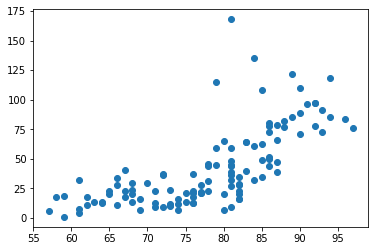

In [31]:
## 이렇게 준비한 데이터가 linear한 데이터인지 확인
# plt.scatter() : 데이터가 흩어진 형태를 보여줌 (어떻게 분포되어있는지)
plt.scatter(df3["Temp"],df3["Ozone"]) # X 데이터: Temp, Y 데이터 : Ozone
plt.show()

In [41]:
# placeholder
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# training data set
# 데이터 정제 필요!!! ## normalization : ( 요소값 - 최소값 ) / ( 최대값 - 최소값 )
x_data = (df3["Temp"]-df3["Temp"].min())/(df3["Temp"].max()-df3["Temp"].min()) # Series 형태로 나옴
y_data = (df3["Ozone"]-df3["Ozone"].min())/(df3["Ozone"].max()-df3["Ozone"].min())

# Weight & bias
W = tf.Variable(tf.random_normal([1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# Hypothesis
H = W * x + b

# Cost Function
cost = tf.reduce_mean(tf.square(H - y))

# 최소화 노드생성
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

# Session 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습(train)
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict={x:x_data, y:y_data})
    
    if step % 300 == 0:
        print("cost : {}".format(cost_val)) # cost 값이 nan으로 발산하고 있음 => 값이 이상하게 나오는거...

cost : 0.33531370759010315
cost : 0.019864169880747795
cost : 0.019817078486084938
cost : 0.01981682889163494
cost : 0.019816827028989792
cost : 0.019816827028989792
cost : 0.019816827028989792
cost : 0.019816827028989792
cost : 0.019816827028989792
cost : 0.019816827028989792


In [37]:
## 0과 1 사이의 값으로 정규화 처리를 해줘야한다.. 그래야지 제대로된 학습이 가능하다.

## normalization : ( 요소값 - 최소값 ) / ( 최대값 - 최소값 )
## standardization : ( 요소값 - 평균 ) / 표준편차  # 음수값도 나올 수 도 있따
df3
## pandas를 이용해서 새로운 DataFrame생성해서 학습해보기


,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
5,28.0,66
6,23.0,65
7,19.0,59
8,8.0,61
10,7.0,74
11,16.0,69


In [42]:
import tensorflow as tf

# 2차원형태 matrix
# training data set

x_data = [[73,80,75],
          [93,88,93],
          [89,91,90],
          [96,96,100],
          [73,66,70]]

y_data = [[152],[185],[180],[196],[142]]

# placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32) # shape=[5,3] : 5행 3열인 2차원배열(matrix)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32) # 행의 개수는 변할수 있기 때문에 None(상관하지 않겠다.don`t care의미)로 쓴다.

# weight & bias
W = tf.Variable(tf.random_normal([3,1]), name = "weight") # 행렬곱해서 W가 3행 1열 / matrix로 난수의 형태로 뽑을꺼임
b = tf.Variable(tf.random_normal([1]), name = "bias")

# Hypothesis
# H = W * x + b
H = tf.matmul(X,W) + b

# Cost Function
cost = tf.reduce_mean(tf.square(H - Y)) # square : 어떤데이터타입이 들어오든 알아서 계산해쥼

# 학습노드 생성
train  = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# for문
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
    
    if step % 300 == 0:
        print("cost : {}".format(cost_val))

cost : 3280.007080078125
cost : nan
cost : nan
cost : nan
cost : nan
cost : nan
cost : nan
cost : nan
cost : nan
cost : nan


In [65]:
import tensorflow as tf
import numpy as np
import pandas as pd

# x축 : "Solar.R","Wind","Temp"
# y축 : "Ozone"
## multiple linear regression 
## Ozone Data 학습 및 예측 

# Fancy indexing
df_x = df[["Solar.R","Wind","Temp"]]
display(df_x.shape)
df_y = df[["Ozone"]]
display(df_y.shape)

# 결측값 제거
df4 = df_x.dropna(how="any", inplace=False)
display(df4.shape)
df5 = df_y.dropna(how="any", inplace=False)
display(df5.shape)

## training data set
# => 데이터 정제 필요
x_data = (df4["Solar.R"]-)/()
y_data = ()/()
    
## placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

## weight & bias
W = tf.Variable(tf.random_normal([]), name="weight")
b = tf.Variable(tf.random_normal([]), name="bias")

## Hypothesis
H =  

## Cost Function
cost = tf.reduce_mean(tf.square())

## 학습 노드 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

## Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())


In [94]:
## 위에 문제 풀이
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler # 데이터 정제 => sklearn모듈 MinMaxScaler함수사용 : 정규화작업 

# Data Loading
df = pd.read_csv("./data/ozone/ozone.csv", sep=",")

# 필요한 컬럼만 추출
df.drop(["Month","Day"], axis=1, inplace=True) # drop은 컬럼과 로우 모두 지울수 있기때문에 axis를 줘야함 axis=1 열방향

# 결측값 처리(제거)
df.dropna(how="any", inplace=True)

# x 데이터 추출
df_x = df.drop("Ozone", axis=1, inplace=False)
# display(df_x)
# y 데이터 추출
df_y = df["Ozone"]
# display(df_y) # Series로 떨어짐 => values

# training data set
x_data = MinMaxScaler().fit_transform(df_x.values)
y_data = MinMaxScaler().fit_transform(df_y.values.reshape([-1,1])) # 데이터를 1열로 만들어서 2차원형태로 변경

# placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
H = tf.matmul(X,W) + b

# Cost Function
cost = tf.reduce_mean(tf.square(H - Y))

# train node 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Session & 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습진행 - 반복 - for문
for step in range(30000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
    
    if step % 3000 == 0:
        print("cost : {}".format(cost_val))
        
# prediction
print(sess.run(H, feed_dict={X:[[190,7.4,67]]})) # placeholder에 정의된 shape를 따라줘야함 / 190,7.4,67,5

cost : 0.3413260877132416
cost : 0.017036033794283867
cost : 0.015741657465696335
cost : 0.015542645007371902
cost : 0.015511973761022091
cost : 0.015507246367633343
cost : 0.015506518073379993
cost : 0.01550640631467104
cost : 0.015506389550864697
cost : 0.015506387688219547
[[46.182]]


16.50497
0.04353742
0.04353742
0.04353742
0.04353742
0.04353742
0.04353742
0.04353742
0.04353742
0.04353742
[0.50340176]


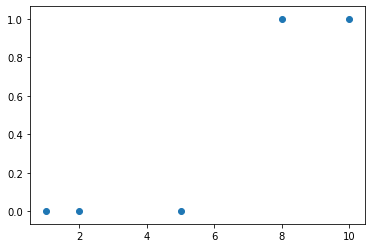

In [3]:
## 2019-07-12

import tensorflow as tf
import matplotlib.pyplot as plt #그래프 그릴때 사용
import warnings

warnings.filterwarnings(action="ignore")

# training data set
x_data = [1,2,5,8,10]
y_data = [0,0,0,1,1]

# placeholder
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([1]), name="weight") 
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis(스칼라 연산)
H = W * x + b

# cost function 
cost = tf.reduce_mean(tf.square(H-y))

# cost -2차함수 -> 미분이용 -> 최소값 찾기
#train node생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습과정 진행
for step in range(30000):
    _,cost_val = sess.run([train,cost], feed_dict={x:x_data,y:y_data})
    if(step % 3000 == 0):
        print(cost_val)

# prediction
print(sess.run(H, feed_dict = {x:[6]}))

# plot
plt.scatter(x_data,y_data)
plt.show()

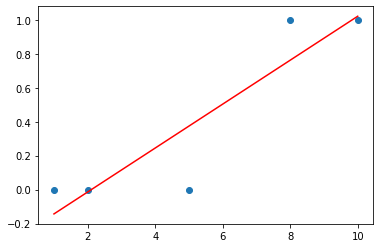

In [4]:
# plot
plt.scatter(x_data,y_data)
plt.plot(x_data,x_data * sess.run(W) + sess.run(b),"r")
plt.show()

In [5]:
#Sigmoid function 예제

import tensorflow as tf
import matplotlib.pyplot as plt #그래프 그릴때 사용
import warnings

warnings.filterwarnings(action="ignore")

# training data set
x_data = [[30,0],
         [10,0],
         [8,1],
         [3,3],
         [2,3],
         [5,1],
         [2,0],
         [1,0]]
y_data = [[1],[1],[1],[1],[1],[0],[0],[0]]

# placeholder
X = tf.placeholder(shape=[None,2],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([2,1]),name="weight") #행열곱한 값 :[2,1]
b = tf.Variable(tf.random_normal([1]),name="bias") 

# Hypothesis
logits = tf.matmul(X,W) + b
H = tf.sigmoid(logits) #sigmoid - 직선을 곡선 형태로 변경

# cost function
# sigmoid_cross_entropy_with_logits -GradientDescent 사용가능하게 변경
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))

# training node 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습과정 진행
for step in range(30000):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data,Y:y_data})
    if(step % 3000 == 0):
        print(cost_val)

# Accuracy (정확도 측정)
# 97~98%정도 나와줘야함
# boolean값을 실수로 변경
# H > 0.5 크면 1로 지정
predict = tf.cast(H > 0.5, dtype=tf.float32) #예측값
correct = tf.equal(predict, Y) #예측값과 실제값이 같으면 1(True)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32)) #정확도 측정
print("정확도:{}".format(sess.run(accuracy,
                              feed_dict={X:x_data,Y:y_data})))
# 정확도:1.0 => 100%
# (최소값 0, 최대값 1)
# =>정확도 측정은 평가 데이터(Test)로 평가해야함
# 가지고 있는 학습데이터셋을 7:3으로 나눠서 학습과 평가를 해야함

# prediction
print(sess.run(H, feed_dict = {X:[[4,2]]}))

7.577001
0.2753701
0.21381187
0.18668908
0.16951975
0.15678768
0.14653523
0.13787729
0.13034703
0.12366992
정확도:1.0
[[0.81499165]]


In [15]:
# 실습 - 점수에 따른 대학원 입학여부 추측
# ./data/admission/admission.csv 대학원 입학여부 데이터
# admit :입학여부 (1:입학 0:입학불가), gre, gpa, rank :등급
# 7:3으로 데이터 나눠서 테스트(7: 학습용,3: 테스트용으로 사용)
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#data loading
df = pd.read_csv("./data/admission/admission.csv",sep=",")
# display(df.head())
df.dropna(how="any", inplace=True) 

step_cnt = int(df.shape[0] * 0.7)
df_x = df.loc[:step_cnt,["gre","gpa","rank"]]
df_y = df.loc[:step_cnt,["admit"]]

#training data set
x_data = MinMaxScaler().fit_transform(df_x.values)
y_data = MinMaxScaler().fit_transform(df_y.values.reshape(-1,1))

#placeholder
X = tf.placeholder(shape=[None,3],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)

#Weight & bias
W = tf.Variable(tf.random_normal([3,1]),name="weight")
b = tf.Variable(tf.random_normal([1]),name="bias")

#Hypothesis
logits = tf.matmul(X,W) + b
H = tf.sigmoid(logits) #sigmoid - 직선을 곡선 형태로 변경

#cost function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))

#training node 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습과정 진행
for step in range(30000):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data,Y:y_data})
    if(step % 3000 == 0):
        print(cost_val)

#Accuracy (정확도 측정)
df_x = df.loc[step_cnt:,["gre","gpa","rank"]]
df_y = df.loc[step_cnt:,["admit"]]

x_data_t = MinMaxScaler().fit_transform(df_x.values)
y_data_t = MinMaxScaler().fit_transform(df_y.values.reshape(-1,1))

predict = tf.cast(H > 0.5, dtype=tf.float32) #예측값
correct = tf.equal(predict, Y) #예측값과 실제값이 같으면 1(True)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32)) #정확도 측정
print("정확도:{}".format(sess.run(accuracy,
                              feed_dict={X:x_data_t,Y:y_data_t})))


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


0.66163224
0.5834495
0.56327796
0.5563769
0.5536019
0.55231977
0.5516539
0.5512747
0.5510435
0.55089617
정확도:0.6583333611488342


In [7]:
# 실습 - 타이타닉 구조 현황 데이터 학습,평가
#./data/titanic/train.csv
#PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
#PassengerId 탑승자id,Survived 구조여부 (1 구조 0 구조못함)
#Pclass 좌석등급, Name 이름, Sex 성별, Age 나이,SibSp 형제수,Parch 부모/자식수,
#Ticket 티켓번호,Fare 요금, Cabin 객실, Embarked 탑승한 곳
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#data loading
df = pd.read_csv("./data/titanic/train.csv",sep=",")

display(df.loc[:20,:])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
df2 = df[["Pclass","Sex","Age","Fare","Survived"]]
df2.dropna(how="any", inplace=True)

df_x = df2[["Pclass","Sex","Age","Fare"]]
df_y = df2[["Survived"]]
#print(df_x.shape)
#print(df_y.shape)
df_x["Sex"] = df2['Sex'].apply(lambda x: '1' if x == 'male' else '2')
df_x["Age"] = df2['Age'].apply(lambda x: '1' if x == 'male' else '2')
df_x

,Pclass,Sex,Age,Fare
0,3,1,2,7.2500
1,1,2,2,71.2833
2,3,2,2,7.9250
3,1,2,2,53.1000
4,3,1,2,8.0500
6,1,1,2,51.8625
7,3,1,2,21.0750
8,3,2,2,11.1333
9,2,2,2,30.0708
10,3,2,2,16.7000


In [13]:
## Multinomal Classification 
import tensorflow as tf

# training data set
x_data = [[10,7,8,5],
         [8,8,9,4],
         [7,8,2,3],
         [6,3,9,3],
         [7,5,7,4],
         [3,5,6,2],
         [2,4,3,1]]

y_data = [[1,0,0],     # one-hot encoding
          [1,0,0],
          [0,1,0],
          [0,1,0],
          [0,1,0],
          [0,0,1],
          [0,0,1]]

# placeholder
X = tf.placeholder(shape=[None,4], dtype=tf.float32)
Y = tf.placeholder(shape=[None,3], dtype=tf.float32)

# weight & bias
W = tf.Variable(tf.random_normal([4,3]), name="weight")
b = tf.Variable(tf.random_normal([3]), name="bias")

# Hypothesis
logits = tf.matmul(X,W) + b
H = tf.nn.softmax(logits)

# Cost Function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))

# train node 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Session & 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습진행 - 반복 - for문
for step in range(30000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
    
    if step % 3000 == 0:
        print(cost_val)

# Accuracy 정확도 측정
# logistic => H가 0~1사이의 실수로 값 산출
# multinomial => (확률, 확률, 확률)
#  예)           (0.4, 0.5, 0.1)  => 1
pridict = tf.arg_max(H,1) # arg_max() : 어느위치에 있는 확률이 큰지 
correct = tf.equal(pridict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("Accuracy : {}".format(sess.run(accuracy, feed_dict={X:x_data, Y:y_data})))
# prediction 예측

10.91825
0.33846167
0.25144625
0.19828959
0.16248058
0.1369248
0.11789898
0.10325836
0.09168744
0.08233913
Accuracy : 1.0


In [20]:
# tf.one_hot(컬럼,3) : 컬럼값을 3개로 분할하고
# Logistic => titanic
# Multinomial => BMI
import numpy as np
import pandas as pd
import tensorflow as tf

# Data Loading
df_bmi = pd.read_csv("./data/BMI/bmi.csv", sep=",", skiprows=3)



,label,height,weight
0,1,188,71
1,2,161,68
2,0,178,52
3,2,136,63
4,1,145,52
5,2,123,45
6,2,135,59
7,0,169,45
8,2,120,46
9,2,154,75


In [4]:
test = tf.one_hot([[0],[1],[2]],3)
sess = tf.Session()
test = sess.run(test)
test

array([[[1., 0., 0.]],

       [[0., 1., 0.]],

       [[0., 0., 1.]]], dtype=float32)

In [ ]:
# machine learning의 3가지 분류
# 1. supervised learning(지도학습)
#  => training data에 label이 부여되어 있다
# 2. unsupervised learning(비지도 학습)
#  => traing data에 lable이 존재하지 않음
#  => clustering작없이 일반적으로 진행
# 3. 강화학습
#  => 상점과 벌점을 이용하여 점점 더 좋은 방향으로 학습해 나가는 방식

# Supervise Learning(지도학습)
# 1. single linear regression(단순 선형회귀) - x 한개, y 한개 존재하는 경우
# 2. multiple linear regression(다중 선형회귀)
#  => multrix
# 3. logistic regression(binary classification) -둘중에 한개의 값으로 판단
# 4. Multinomial classification - 여러개 중에 한개의 값으로 판단

# 추가적으로 알아야 할 내용
# Large learning rate 인 경우
#  Overshooting - W값 ,값이 클경우 이동 거리가 큼
# Small learing rate 인 경우
#  local minimum문제에 봉착할 수 있음(값을 못찾는 문제)

# learning rate- 0.01값으로 시작
# 입력데이터의 값이 범위가 클 경우 
# - 학습진행이 되지 않는다
# - normalization (정규화),standardization (표준화) 진행되어야 함. 일반적으로 normalization 사용됨

# Overfitting
# -training data set에는 아주 적합한 모델이지만 실제 데어터에는 적용이 안되는 경우
# Evaluation
# - training data와 test data 분리하여 평가(8:2, 7:3)

# MNIST
# 예) 우편번호를 스캔하여 읽어들인 숫자 하나하나 픽셀값을 학습시켜서 
# 새로운 값이 들어왔을때 예측을 시킴
# 숫자에 대한 픽셀정보(28*28)를 학습
# =>이 픽셀정보가 어떤숫자인지 알려주는 label도 제공(0~9)

In [81]:
## 기본 MNIST 예제 (multinomial classification)
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

# Data Loading 
mnist = input_data.read_data_sets("./data/mnist", one_hot=True) # 폴더를 만들고 데이터 저장 , 압축파일 파일 압축풀 필요없음

# 데이터 확인
print(mnist.train.num_examples) # 학습용 데이터의 개수 / 학습용 = train , 테스트용 = 
print(mnist.train.images.shape) # (55000, 784)
                                #  28 X 28 이미지를 1차원 형태로 저장
print(mnist.train.labels.shape)

# plt.imshow(mnist.train.images[0].reshape(28,28), cmap="Greys", interpolation="nearest") # 1차원데이터를 2차원데이터로 변경
# # 55000개의 그림중에 이미지를 선택해서 픽셀정보를 줘야한다.
# plt.show()
# print(mnist.train.labels[0])

# placeholder
X = tf.placeholder(shape=[None, 784], dtype=tf.float32) 
Y = tf.placeholder(shape=[None, 10], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([784,10]), name="weight")
b = tf.Variable(tf.random_normal([10]), name="bias")

# Hypothesis / 각각에 대한 확률을 구해야한다.
logits = tf.matmul(X,W)+b  # 행렬곱을 기본으로 잡는다.
H = tf.nn.softmax(logits)

# Cost Function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))

# train node 생성
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# train = optimizer.minimize(cost)

# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

""" 
사용하는 데이터의 크기가 상당히 크다.
메모리의 문제때문에 한번에 불러올수 없다.
데이터의 크기에 상관없이 학습하는 방식이 필요하다.!! => 잘라서 학습하는 방식으로 수행
epoch : training data를 1번 학습시키는 것.
"""
# epoch 학습진행
training_epoch = 30 # for 루프를 30만큼 돌린다는 의미
batch_size = 100 #  55000개의 행을 다 읽어들이는게 아니라 100개의 행을 읽어서 반복학습!! (아중루프가 돔) / 얼마만큼의 사이즈로 불러드릴껀지

for step in range(training_epoch): # 30 epoch 만큼 반복
    num_of_iter = int(mnist.train.num_examples /  batch_size) # 550번 끊어 읽겠다는 의미
    cost_val = 0
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size) 
        _, cost_val = sess.run([train,cost], feed_dict={X:batch_x , Y:batch_y})
        
    if step % 3 == 0:
        print(cost_val)     

# 학습진행
# for step in range(3000):
#     _, cost_val = sess.run([train,cost], feed_dict={X:mnist.train.images, Y:mnist.train.labels})
    
#     if step % 300 == 0:
#         print(cost_val)

# Accuracy(정확도) 측정
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

result = sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels})

print("정확도 :{}".format(result))

# Prediction
## 종이에 숫자를 하나 써서 스캐너로 읽어들인 후 28*28의 형태의 픽셀 데이터로 변환

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
55000
(55000, 784)
(55000, 10)
4.1983714
2.1391783
1.6185739
1.6010695
1.0683154
0.84826386
0.7693103
1.0302414
0.68998885
1.090036
정확도 :0.8335999846458435


In [67]:
## Deep Learning

# logistic regression을 이용하여 AND 연산을 학습

import tensorflow as tf

# training data set
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]

y_data = [[0],[0],[0],[1]]

# placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([2,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
logits = tf.matmul(X,W) + b
H = tf.sigmoid(logits)

# Cost Function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))

# train node
# train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
        
    if step % 300 == 0:
        print(cost_val)     
        
# Accuracy 측정 
predict = tf.cast(H > 0.5, dtype=tf.float32)
correct = tf.equal(predict,Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print("정확도 : {}".format(sess.run([accuracy], feed_dict={X:x_data, Y:y_data})))

0.7288799
0.63950753
0.5713611
0.51655877
0.47173175
0.43456194
0.40331703
0.37670112
0.35374552
0.33372247
정확도 : [1.0]


In [70]:
## Deep Learning

# NN(Neural Network)을 이용하여 XOR 연산을 학습

import tensorflow as tf

# training data set( XOR에 대한 진리표)
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]

y_data = [[0],[1],[1],[0]]

# placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias
# 첫번째 레이어
W1 = tf.Variable(tf.random_normal([2,8]), name="weight1") # ([2,?]) : ? : 두번째레이어의 몇개의 input을 사용할껀지
b1 = tf.Variable(tf.random_normal([8]), name="bias1")
layer1 = tf.sigmoid(tf.matmul(X,W1) + b1)

# 두번째 레이어
W2 = tf.Variable(tf.random_normal([8,1]), name="weight2") 
b2 = tf.Variable(tf.random_normal([1]), name="bias2")

# Hypothesis
logits = tf.matmul(layer1,W2) + b2
H = tf.sigmoid(logits)

# Cost Function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))

# train node
# train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(30000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
        
    if step % 3000 == 0:
        print(cost_val)     
        
# Accuracy 측정 
predict = tf.cast(H > 0.5, dtype=tf.float32)
correct = tf.equal(predict,Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print("정확도 : {}".format(sess.run([accuracy], feed_dict={X:x_data, Y:y_data})))

0.8809452
0.6462946
0.5802996
0.4986219
0.39928943
0.29050106
0.20047064
0.13998869
0.101986125
0.07773567
정확도 : [1.0]


In [10]:
## NNIST (Neural Network)
## tensorflow에 example로 포함된 MNIST예제를 NN으로 학습.(accuracy => 95%)

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Data Loading 
mnist = input_data.read_data_sets("./data/mnist", one_hot=True) # 폴더를 만들고 데이터 저장 , 압축파일 파일 압축풀 필요없음

# 데이터 확인
print(mnist.train.num_examples) # 학습용 데이터의 개수 / 학습용 = train , 테스트용 = 
print(mnist.train.images.shape) # (55000, 784)
                                #  28 X 28 이미지를 1차원 형태로 저장
print(mnist.train.labels.shape)

# plt.imshow(mnist.train.images[0].reshape(28,28), cmap="Greys", interpolation="nearest") # 1차원데이터를 2차원데이터로 변경
# # 55000개의 그림중에 이미지를 선택해서 픽셀정보를 줘야한다.
# plt.show()
# print(mnist.train.labels[0])

# placeholder
X = tf.placeholder(shape=[None, 784], dtype=tf.float32) 
Y = tf.placeholder(shape=[None, 10], dtype=tf.float32)

# Weight & bias
W1 = tf.Variable(tf.random_normal([784,256]), name="weight1")
b1 = tf.Variable(tf.random_normal([256]), name="bias1")
layer1 = tf.nn.relu(tf.matmul(X,W1) + b1) # sigmoid대신 relu사용 :  값이 희미해지기 때문에 relu사용 / sigmoid : 0과 1사이  / softmax : 확률값

W2 = tf.Variable(tf.random_normal([256,256]), name="weight2")
b2 = tf.Variable(tf.random_normal([256]), name="bias2")
layer2 = tf.nn.relu(tf.matmul(layer1,W2) + b2)

W3 = tf.Variable(tf.random_normal([256,10]), name="weight3")
b3 = tf.Variable(tf.random_normal([10]), name="bias3")

# Hypothesis
logits = tf.matmul(layer2,W3) + b3  
H = tf.nn.softmax(logits)

# Cost Function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))

# train node 생성
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# train = optimizer.minimize(cost)
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
# GradientDescentOptimizer 보다 효율 좋은 AdamOptimizer 사용  / learning_rate=0.01 => learning_rate=0.001


# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

""" 
사용하는 데이터의 크기가 상당히 크다.
메모리의 문제때문에 한번에 불러올수 없다.
데이터의 크기에 상관없이 학습하는 방식이 필요하다.!! => 잘라서 학습하는 방식으로 수행
epoch : training data를 1번 학습시키는 것.
"""
# epoch 학습진행
training_epoch = 30 # for 루프를 30만큼 돌린다는 의미
batch_size = 100 #  55000개의 행을 다 읽어들이는게 아니라 100개의 행을 읽어서 반복학습!! (아중루프가 돔) / 얼마만큼의 사이즈로 불러드릴껀지

for step in range(training_epoch): # 30 epoch 만큼 반복
    num_of_iter = int(mnist.train.num_examples /  batch_size) # 550번 끊어 읽겠다는 의미
    cost_val = 0
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size) 
        _, cost_val = sess.run([train,cost], feed_dict={X:batch_x , Y:batch_y})
        
    if step % 3 == 0:
        print(cost_val)     

# 학습진행
# for step in range(3000):
#     _, cost_val = sess.run([train,cost], feed_dict={X:mnist.train.images, Y:mnist.train.labels})
    
#     if step % 300 == 0:
#         print(cost_val)

# Accuracy(정확도) 측정
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

result = sess.run([accuracy], feed_dict={X:mnist.test.images, Y:mnist.test.labels})

print("정확도 :{}".format(result))

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
55000
(55000, 784)
(55000, 10)
46.9638
14.053117
16.032127
8.286947
0.48941773
0.18940124
7.378783e-07
0.0
0.0
0.061747823
정확도 :[0.9583]


In [14]:
## NNIST (Neural Network)
## tensorflow에 example로 포함된 MNIST예제를 NN으로 학습.(accuracy => 95%)

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph()

# Data Loading 
mnist = input_data.read_data_sets("./data/mnist", one_hot=True) # 폴더를 만들고 데이터 저장 , 압축파일 파일 압축풀 필요없음

# 데이터 확인
print(mnist.train.num_examples) # 학습용 데이터의 개수 / 학습용 = train , 테스트용 = 
print(mnist.train.images.shape) # (55000, 784)
                                #  28 X 28 이미지를 1차원 형태로 저장
print(mnist.train.labels.shape)

# plt.imshow(mnist.train.images[0].reshape(28,28), cmap="Greys", interpolation="nearest") # 1차원데이터를 2차원데이터로 변경
# # 55000개의 그림중에 이미지를 선택해서 픽셀정보를 줘야한다.
# plt.show()
# print(mnist.train.labels[0])

# placeholder
X = tf.placeholder(shape=[None, 784], dtype=tf.float32) 
Y = tf.placeholder(shape=[None, 10], dtype=tf.float32)

# Weight & bias # weight값 초기화
W1 = tf.get_variable("weight1", shape=[784,256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name="bias1")
layer1 = tf.nn.relu(tf.matmul(X,W1) + b1) # sigmoid대신 relu사용 :  값이 희미해지기 때문에 relu사용 / sigmoid : 0과 1사이  / softmax : 확률값

W2 = tf.get_variable("weight2",shape=[256,256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name="bias2")
layer2 = tf.nn.relu(tf.matmul(layer1,W2) + b2)

W3 = tf.get_variable("weight3",shape=[256,10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]), name="bias3")

# Hypothesis
logits = tf.matmul(layer2,W3) + b3  
H = tf.nn.relu(logits)

# Cost Function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))

# train node 생성
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# train = optimizer.minimize(cost)
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
# GradientDescentOptimizer 보다 효율 좋은 AdamOptimizer 사용  / learning_rate=0.01 => learning_rate=0.001


# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

""" 
사용하는 데이터의 크기가 상당히 크다.
메모리의 문제때문에 한번에 불러올수 없다.
데이터의 크기에 상관없이 학습하는 방식이 필요하다.!! => 잘라서 학습하는 방식으로 수행
epoch : training data를 1번 학습시키는 것.
"""
# epoch 학습진행
training_epoch = 30 # for 루프를 30만큼 돌린다는 의미
batch_size = 100 #  55000개의 행을 다 읽어들이는게 아니라 100개의 행을 읽어서 반복학습!! (아중루프가 돔) / 얼마만큼의 사이즈로 불러드릴껀지

for step in range(training_epoch): # 30 epoch 만큼 반복
    num_of_iter = int(mnist.train.num_examples /  batch_size) # 550번 끊어 읽겠다는 의미
    cost_val = 0
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size) 
        _, cost_val = sess.run([train,cost], feed_dict={X:batch_x , Y:batch_y})
        
    if step % 3 == 0:
        print(cost_val)     

# 학습진행
# for step in range(3000):
#     _, cost_val = sess.run([train,cost], feed_dict={X:mnist.train.images, Y:mnist.train.labels})
    
#     if step % 300 == 0:
#         print(cost_val)

# Accuracy(정확도) 측정
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

result = sess.run([accuracy], feed_dict={X:mnist.test.images, Y:mnist.test.labels})

print("정확도 :{}".format(result))

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
55000
(55000, 784)
(55000, 10)
0.12680094
0.011600091
0.0038947864
0.0022243808
0.011003909
0.0013692505
0.010666206
0.0016398019
0.02676882
5.0507202e-05
정확도 :[0.978]


In [10]:
## 2019-07-17
# Convolution example
import tensorflow as tf
import numpy as np

# imange의 형태
# 1장의 이미지는 3차원 형태의 데이터
# (이미지의 개수, width, height, color)
# (1, 3, 3, 1)
image = np.array([[[[1],[2],[3]],
                  [[4],[5],[6]],
                  [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
# filter를 준비해야한다. => 3차원 
# (width, height, color, 필터의 개수) , 4차원
# (2, 2, 1, 1)
# 필터들의 집합 => weight
weight = np.array([[[[1, -5, 10]],[[1, -5, 10]]],
                   [[[1, -5, 10]],[[1, -5, 10]]]])
print(weight.shape)

# stride 지정 => 사실 2차원이면 되는데 행렬연산때문에 
# (1, stride width, stride height, 1) => 4차원으로 표현
# stride = [1,1,1,1]
#                    (이미지,필터,)
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1], padding="VALID") 
# padding="VALID": 이미지의 사이즈가 줄어든다. / padding="SAME" :원본과 똑같이 맞추라는 의미
print(conv2d.shape)
# 하나의 이미지에 필터 3개를 적용시키면 (1, 2, 2, 3)

(1, 3, 3, 1)
(2, 2, 1, 3)
(1, 2, 2, 3)


Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz


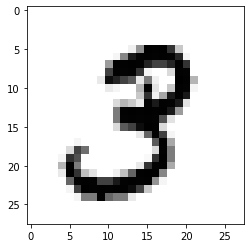

(1, 14, 14, 5)
(5, 14, 14, 1)


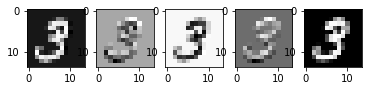

In [25]:
## mnist 예제를 이용해서 하나의 이미지에 대한
## convolutional image 5개를 생성해보기!
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt # 일반적으로 그림그리는 모듈

# Data Loading
mnist = input_data.read_data_sets("./data/mnist", one_hot=True) # y측 레이블이 one_hot형태로 나올수 있게 해줌

# training 이미지 중 2번째 이미지의 정보를 얻어온다. 픽셀테이터 땡겨오는것
img = mnist.train.images[1] # 1차원 데이터
img = img.reshape(28,28)    # 2차원 데이터로 변환
# print(img.shape) # 1차원의형태를 2차원의 형태로 변경해줘야한다.

plt.imshow(img, cmap="Greys", interpolation="nearest")
plt.show()

# 해당 이미지를 convolution 이미지로 변경
# 2차원 형태의 img를 4차원 형태의 img로 변환
img = img.reshape(-1,28,28,1) # 가로,세로는 변하지 않고 흑백컬러1 / 이미지가 여러장이면 -1부분이 바뀌게 될것임.
# img.shape
# 이미지가 준비 되었으니 필터를 여러개 준비 (5개 정도)
# 5개의 필터를 이용 , 2 x 2 짜리 필터를 이용
# (2,2,1,5) 랜덤하게 만들꺼임
W = tf.Variable(tf.random_normal([2,2,1,5]), name="filter")
conv2d = tf.nn.conv2d(img,W,strides=[1,2,2,1], padding="SAME")
# 2칸씩움직이는 stride / padding="SAME" : 원본과 똑같은 이미지가 5개 생성
print(conv2d.shape) # (1, 14, 14, 5) => 14 x 14 짜리 이미지가 5개 생성

# 새로 생성된 이미지를 plt를 이용해서 확인
sess = tf.Session() # sess.run을 해야지 배열값을 얻을수 있다.
sess.run(tf.global_variables_initializer()) # 초기화
conv2d = sess.run(conv2d)

# 배열의 축을 임의로 변경 (1, 14, 14, 5) => (5, 14, 14, 1) -> 루프를 돌리기 위해서 배열 축 임의로 변경 , 데이터를 쉽게 추출하기 위해서
conv2d = np.swapaxes(conv2d,0,3) 
print(conv2d.shape) # (5, 14, 14, 1)

fig,axes = plt.subplots(1,5) # 1행 5열짜리 subplot을 생성 / subplots : 그림을 여러개 그릴 수 있음
                             # axes : 각각의 subplot의 배열
for idx,item in enumerate(conv2d): # enumerate : 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환
    axes[idx].imshow(item.reshape(14,14), cmap="Greys")
plt.show()
    

In [36]:
%%time
## 셀 수행하는 데 얼마나 걸리는지 출력하는거, 제일 상단에 있어야한다. %%time은 jupyter notebook에서만 돌아간당!!!
#### MNIST with CNN
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

## 0. 그래프 초기화
tf.reset_default_graph()

## 1. Data Loading & Data 정제
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

## 2. placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32) 
Y = tf.placeholder(shape=[None,10], dtype=tf.float32) 
drop_rate = tf.placeholder(dtype=tf.float32)

## 3. Convolution 
## 3.1 Convolution layer 1
x_img =  tf.reshape(X,[-1,28,28,1]) # x에대한 shape를 변경해줄꺼임 2차원 -> 4차원 (이미지의 개수, 가로, 세로, 컬러)
W1 = tf.Variable(tf.random_normal([2,2,1,32]), name="filter1") # 2행 2열 색 32개의 필터
L1 = tf.nn.conv2d(x_img,W1,strides=[1,2,2,1], padding="SAME") # tf.nn.conv2d(입력이미지, 필터, stride=[],padding="")
                                                              #                               얼마만큼 움직일껀지
print(L1.shape)  # (?, 14, 14, 32)

# sigmoid는 할수록 값이 작아져서 0에 가까워지기 때문에 relu를 사용한다.
L1 = tf.nn.relu(L1)

L1 = tf.nn.max_pool(L1,ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME") 
# tf.nn.max_pool(입력받을값,ksize=[],strides=[], padding="") : 큰 데이터를 작은데이터로 줄이는 것
print(L1.shape)  # (?, 7, 7, 32)

## 3.2 Convolution layer 2
W2 = tf.Variable(tf.random_normal([3,3,32,64]), name="filter2") # 3행 3열 색 64개의 필터 => 32 -> 입력으로 들어오는 형태 shape를 맞춰줘야함
L2 = tf.nn.conv2d(L1,W2,strides=[1,1,1,1], padding="SAME") # tf.nn.conv2d(입력이미지, 필터, stride=[],padding="")
                                                              #                               얼마만큼 움직일껀지
print(L2.shape)  # (?, 7, 7, 64)

# sigmoid는 할수록 값이 작아져서 0에 가까워지기 때문에 relu를 사용한다.
L2 = tf.nn.relu(L2)

L2 = tf.nn.max_pool(L2,ksize=[1,1,1,1], strides=[1,1,1,1], padding="SAME") 
# tf.nn.max_pool(입력받을값,ksize=[],strides=[], padding="") : 큰 데이터를 작은데이터로 줄이는 것
print(L2.shape)  # (?, 7, 7, 64) => ?는 이미지의 수

L2 = tf.reshape(L2,[-1,7*7*64])

## 4. Neural Network
## 4.1 Weight & bias
W3 = tf.get_variable("weight3", shape=[7*7*64,256], initializer=tf.contrib.layers.xavier_initializer()) # shape=["컬럼수","아웃풋수"] / 위에서는 필터의 형태로 잡기위해 tf.Variable()사용

# b3 = 

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
(?, 14, 14, 32)
(?, 7, 7, 32)
(?, 7, 7, 64)
(?, 7, 7, 64)
Wall time: 1.01 s
